<a href="https://colab.research.google.com/github/sanskriti-lal/EmoFuse/blob/main/EmoFuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os



In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importng dataset

In [ ]:
filname = '../input/facial-expression/fer2013/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


# Pre-Processing

In [ ]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
filename = 'fer2013.csv'

In [ ]:
def getData(filename):
    import csv
    import numpy as np

    X = []
    Y = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        first = True
        for row in reader:
            if first:  # Skip header
                first = False
                continue

            label = int(row[0])
            pixels = row[1].split()  # Split the pixel string into individual elements

            if len(pixels) != 48 * 48:
                print(f"Inconsistent data at row {reader.line_num}: Expected 2304, got {len(pixels)}")

            X.append([int(p) for p in pixels])
            Y.append(label)

    return X, Y


In [ ]:
def getData(filename):
    import csv
    import numpy as np

    X = []
    Y = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        first = True
        for row in reader:
            if first:
                first = False
                continue

            label = int(row[0])
            pixels = row[1].split()

            # Ensure consistent pixel count (48 * 48 = 2304)
            if len(pixels) != 2304:
                continue  # Skip rows with inconsistent pixel data

            X.append([int(p) for p in pixels])
            Y.append(label)

    # Convert to numpy arrays and normalize
    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y


In [ ]:
X, Y = getData(filename)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
# Correct import for Keras layers in TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import CategoricalAccuracy


In [ ]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Correct imports from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import CategoricalAccuracy


TensorFlow version: 2.15.0


In [ ]:
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Define the model creation function
def my_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # Assuming 7 output classes
    ])
    return model

# Create the model
model = my_model()

# Compile the model with an optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the learning rate
K.set_value(model.optimizer.learning_rate, 1e-3)  # This should now work


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the model
def my_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # Assuming 7 output classes
    ])
    return model

# Set the path for saving the model
path_model = 'model_filter.h5'  # File path for saving the model

# Clear the session to avoid any issues with previous models/graphs
K.clear_session()

# Create a new model instance
model = my_model()

# Compile the model with an optimizer
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with checkpoints
h = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[ModelCheckpoint(filepath=path_model)]
)


Epoch 1/20
159/159 [==============================] - 56s 330ms/step - loss: 2.0944 - accuracy: 0.2156 - val_loss: 1.8349 - val_accuracy: 0.2638
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


159/159 [==============================] - 35s 221ms/step - loss: 1.8425 - accuracy: 0.2403 - val_loss: 1.7981 - val_accuracy: 0.2709
Epoch 3/20
159/159 [==============================] - 35s 220ms/step - loss: 1.7992 - accuracy: 0.2453 - val_loss: 1.7246 - val_accuracy: 0.2744
Epoch 4/20
159/159 [==============================] - 35s 221ms/step - loss: 1.7547 - accuracy: 0.2617 - val_loss: 1.7032 - val_accuracy: 0.3215
Epoch 5/20
159/159 [==============================] - 32s 204ms/step - loss: 1.7115 - accuracy: 0.2928 - val_loss: 1.6521 - val_accuracy: 0.3597
Epoch 6/20
159/159 [==============================] - 37s 234ms/step - loss: 1.6798 - accuracy: 0.3063 - val_loss: 1.6406 - val_accuracy: 0.3623
Epoch 7/20
159/159 [==============================] - 33s 208ms/step - loss: 1.6354 - accuracy: 0.3311 - val_loss: 1.6153 - val_accuracy: 0.3739
Epoch 8/20
159/159 [==============================] - 35s 218ms/step - loss: 1.5982 - accuracy: 0.3456 - val_loss: 1.5793 - val_accuracy: 0.3

# Displaying analysis results

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

36/36 [==============================] - 1s 20ms/step


(1126, 7)

# Testing


1/1 [==============================] - 0s 26ms/step


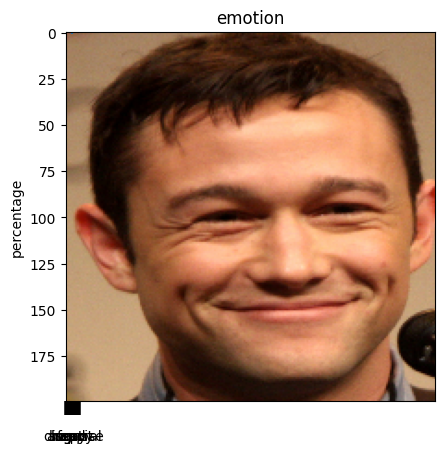

Expression Prediction: happy


In [ ]:
from skimage import io
img = image.load_img('img1.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('img1.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 61ms/step


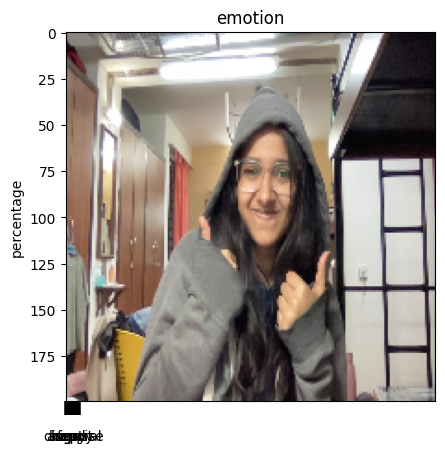

Expression Prediction: neutral


In [ ]:
from skimage import io
img = image.load_img('img 8.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('img 8.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


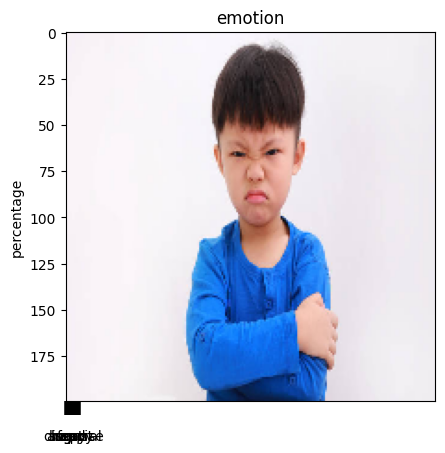

Expression Prediction: angry


In [ ]:
from skimage import io
img = image.load_img('img2.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('img2.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 25ms/step


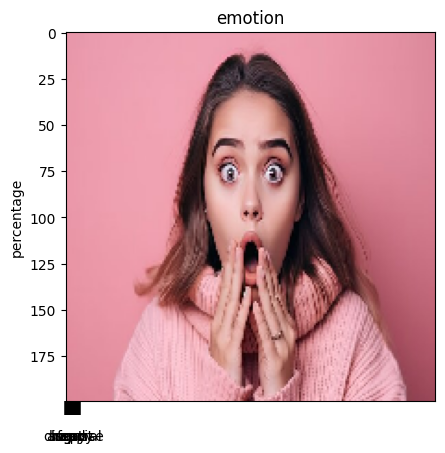

Expression Prediction: sad


In [ ]:
from skimage import io
img = image.load_img('img3.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('img3.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

num_classes = 7

y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Example feature data and labels
X = np.random.rand(450, 48, 48, 1)  # 450 samples of 48x48 grayscale images
Y = np.random.randint(0, 7, 450)  # 450 labels (integers from 0 to 6 for 7 classes)

# Ensure proper data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(Y_train, num_classes=7)
y_test_onehot = to_categorical(Y_test, num_classes=7)

# Check the lengths after splitting
print("X_test length:", len(X_test))  # Should be 90 (20% of 450)
print("y_test_onehot length:", len(y_test_onehot))  # Should be 90

# The lengths should match before evaluation
assert len(X_test) == len(y_test_onehot), "X and Y sample counts do not match"


X_test length: 90
y_test_onehot length: 90


Epoch 1/20
6/6 [==============================] - 2s 263ms/step - loss: 7.4912 - accuracy: 0.1111 - val_loss: 3.3243 - val_accuracy: 0.1222
Epoch 2/20
6/6 [==============================] - 1s 230ms/step - loss: 3.0893 - accuracy: 0.1528 - val_loss: 2.0056 - val_accuracy: 0.1444
Epoch 3/20
6/6 [==============================] - 1s 207ms/step - loss: 1.9613 - accuracy: 0.1444 - val_loss: 1.9461 - val_accuracy: 0.1000
Epoch 4/20
6/6 [==============================] - 1s 216ms/step - loss: 1.9458 - accuracy: 0.1222 - val_loss: 1.9461 - val_accuracy: 0.1889
Epoch 5/20
6/6 [==============================] - 1s 222ms/step - loss: 1.9458 - accuracy: 0.1250 - val_loss: 1.9461 - val_accuracy: 0.1000
Epoch 6/20
6/6 [==============================] - 1s 213ms/step - loss: 1.9462 - accuracy: 0.1417 - val_loss: 1.9631 - val_accuracy: 0.1000
Epoch 7/20
6/6 [==============================] - 2s 293ms/step - loss: 1.9461 - accuracy: 0.1611 - val_loss: 1.9461 - val_accuracy: 0.1778
Epoch 8/20
6/6 [====

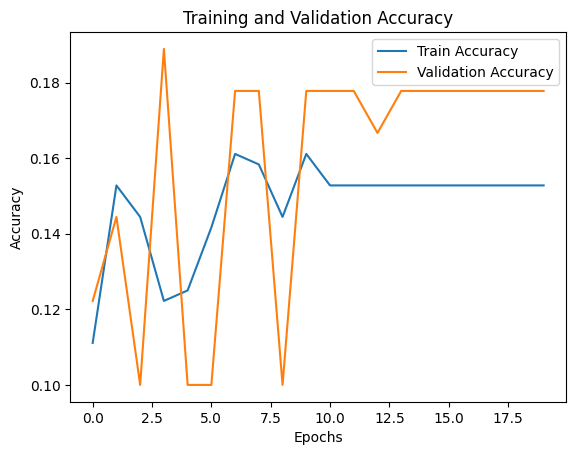

In [ ]:
# Compile the model with accuracy as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and track accuracy
history = model.fit(
    x=X_train,
    y=y_train_onehot,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test_onehot),
    verbose=1
)

# Plot the accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model and get the accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)

# Convert accuracy to percentage
test_accuracy_percentage = test_accuracy * 100

print("Test Accuracy Percentage:", test_accuracy_percentage, "%")


3/3 [==============================] - 0s 36ms/step - loss: 1.9461 - accuracy: 0.1778
Test Accuracy Percentage: 17.777778208255768 %


# Integrating Fuzzy logic


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=11fc1e40f564c6af3211e195dece110942f0b2e6d95385aadabb0dbc981d902d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

# Sample data representing an image
sample_image = np.random.rand(48, 48)  # Example 48x48 image

# Compute mean of the image (brightness metric)
image_brightness = np.mean(sample_image)  # No conflict with variable names

print("Image Brightness:", image_brightness)


Image Brightness: 0.49705135697089037


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

# Define fuzzy sets and membership functions for brightness
brightness = ctrl.Antecedent(np.arange(0, 256, 1), 'brightness')

brightness['dark'] = fuzz.trimf(brightness.universe, [0, 0, 100])
brightness['medium'] = fuzz.trimf(brightness.universe, [50, 100, 200])
brightness['bright'] = fuzz.trimf(brightness.universe, [150, 255, 255])

# Define a consequent variable with valid membership functions
brightness_output = ctrl.Consequent(np.arange(0, 11, 1), 'brightness_output')

brightness_output['very_dark'] = fuzz.trimf(brightness_output.universe, [0, 1, 2])
brightness_output['dark'] = fuzz.trimf(brightness_output.universe, [1, 3, 5])
brightness_output['medium'] = fuzz.trimf(brightness_output.universe, [4, 6, 7])
brightness_output['bright'] = fuzz.trimf(brightness_output.universe, [6, 8, 10])

# Define fuzzy rules with the correct type for the consequent
rule_very_dark = ctrl.Rule(brightness['dark'], brightness_output['very_dark'])
rule_dark = ctrl.Rule(brightness['medium'], brightness_output['dark'])
rule_medium = ctrl.Rule(brightness['bright'], brightness_output['medium'])

# Create a control system and simulation for brightness
brightness_ctrl = ctrl.ControlSystem([rule_very_dark, rule_dark, rule_medium])
brightness_sim = ctrl.ControlSystemSimulation(brightness_ctrl)

# Compute the fuzzy value for brightness in a given image
sample_image = np.random.rand(48, 48) * 255  # Simulated 48x48 image with values from 0 to 255

# Calculate a simple metric (e.g., mean brightness)
image_brightness = np.mean(sample_image)

# Provide input to the fuzzy logic system
brightness_sim.input['brightness'] = image_brightness

# Run the fuzzy logic simulation to determine the fuzzy category
brightness_sim.compute()

# Retrieve the fuzzy output
fuzzy_brightness_output = brightness_sim.output['brightness_output']

print("Fuzzy Brightness Output:", fuzzy_brightness_output)  # Expected fuzzy output


Fuzzy Brightness Output: 2.9999999999999996


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

emotion_confidence = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'emotion_confidence')

emotion_confidence['low'] = fuzz.trimf(emotion_confidence.universe, [0, 0, 0.3])
emotion_confidence['medium'] = fuzz.trimf(emotion_confidence.universe, [0.2, 0.5, 0.8])
emotion_confidence['high'] = fuzz.trimf(emotion_confidence.universe, [0.7, 1, 1])

final_decision = ctrl.Consequent(np.arange(0, 11, 1), 'final_decision')
final_decision['reject'] = fuzz.trimf(final_decision.universe, [0, 1, 2])
final_decision['uncertain'] = fuzz.trimf(final_decision.universe, [2, 5, 7])
final_decision['accept'] = fuzz.trimf(final_decision.universe, [7, 8, 10])

rule_accept = ctrl.Rule(emotion_confidence['high'], final_decision['accept'])
rule_uncertain = ctrl.Rule(emotion_confidence['medium'], final_decision['uncertain'])
rule_reject = ctrl.Rule(emotion_confidence['low'], final_decision['reject'])

# Create the fuzzy control system with the corrected rules
decision_ctrl = ctrl.ControlSystem([rule_accept, rule_uncertain, rule_reject])
decision_sim = ctrl.ControlSystemSimulation(decision_ctrl)

# Provide fuzzy input
decision_sim.input['emotion_confidence'] = 0.75  # Example confidence level

# Compute the output from the fuzzy system
decision_sim.compute()

# Retrieve the output from the fuzzy system
final_decision_output = decision_sim.output['final_decision']

print("Final Decision Output:", final_decision_output)  # Should align with the membership functions defined


Final Decision Output: 6.010101010101009


# Confusion matrix



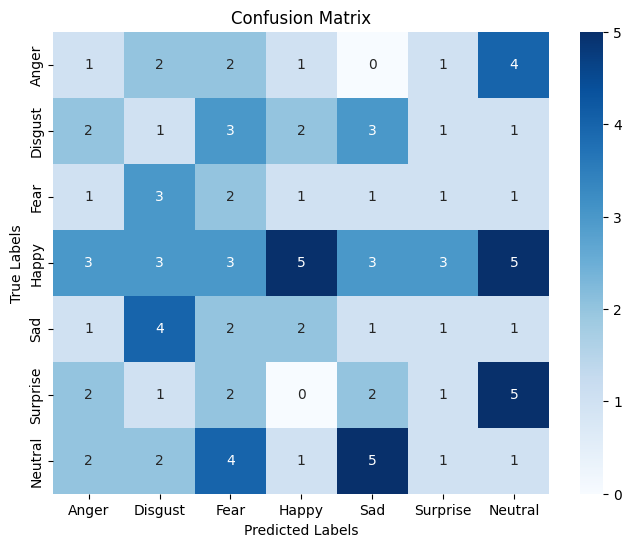

Accuracy: 0.12

Classification Report:
              precision    recall  f1-score   support

       Anger       0.08      0.09      0.09        11
     Disgust       0.06      0.08      0.07        13
        Fear       0.11      0.20      0.14        10
       Happy       0.42      0.20      0.27        25
         Sad       0.07      0.08      0.07        12
    Surprise       0.11      0.08      0.09        13
     Neutral       0.06      0.06      0.06        16

    accuracy                           0.12       100
   macro avg       0.13      0.11      0.11       100
weighted avg       0.16      0.12      0.13       100



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have ground truth labels and predicted labels from your model
# Example ground truth labels and predicted labels for 100 samples
ground_truth = np.random.randint(0, 7, size=100)  # Random labels from 0 to 6 (inclusive) for 100 samples
predicted_labels = np.random.randint(0, 7, size=100)  # Random predicted labels from 0 to 6 (inclusive) for 100 samples

# Create a confusion matrix
cm = confusion_matrix(ground_truth, predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
            yticklabels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(ground_truth, predicted_labels, target_names=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']))
